In [1]:
import numpy as np
import desc.io

from desc.geometry import FourierRZToroidalSurface
from desc.plotting import plot_comparison, plot_surfaces

DESC version 0.12.1+166.g6868c3988,using JAX backend, jax version=0.4.28, jaxlib version=0.4.28, dtype=float64
Using device: CPU, with 6.02 GB available memory


In [27]:
# Load Equilibrium and Make Surface

eq0 = desc.io.load("QA.h5")
eq1 = desc.io.load("QA3_1_iota_0_42_AR5.h5")

surf = FourierRZToroidalSurface(
    R_lmn =   [0.97, 0.33],
    modes_R = [(0, 0), (-1, 0)],
    Z_lmn =   [0.4],
    modes_Z = [(1, 0)],
)
print(eq0.NFP)
print(eq1.NFP)
print(surf.NFP)

2
3
1


In [ ]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../"))

import desc
from desc.objectives import *
from desc.basis import ZernikePolynomial, FourierZernikeBasis, DoubleFourierSeries
from desc.transform import Transform
from desc.equilibrium import EquilibriaFamily, Equilibrium
from desc.plotting import (
    plot_1d,
    plot_2d,
    plot_3d,
    plot_comparison, 
    plot_section, 
    plot_fsa, 
    plot_surfaces,
)
from desc.optimize import Optimizer
from desc.perturbations import *
import numpy as np
np.set_printoptions(linewidth=np.inf)

from desc.geometry import (
    FourierRZToroidalSurface,  
    SplineXYZCurve, 
    FourierXYZCurve,
)
%matplotlib inline
from desc.utils import copy_coeffs
import matplotlib.pyplot as plt
from desc.examples import get
from desc.objectives.getters import (
    get_fixed_boundary_constraints, 
    maybe_add_self_consistency,
)
from desc.grid import LinearGrid, QuadratureGrid, Grid
import plotly.graph_objects as go
from desc.profiles import PowerSeriesProfile
from desc.__main__ import main
from desc.vmec_utils import vmec_boundary_subspace
from desc.compute import data_index
from desc.coils import SplineXYZCoil
from desc.equilibrium import Equilibrium
from desc.geometry import FourierRZToroidalSurface
from desc.objectives import (
    ObjectiveFunction,
    ForceBalance,
    get_fixed_boundary_constraints,
)
from desc.optimize import Optimizer
from desc.plotting import plot_1d, plot_section, plot_surfaces
from desc.profiles import PowerSeriesProfile
from desc.examples import get
from desc.grid import LinearGrid
import plotly.graph_objects as go

from scipy.linalg import qr_insert, qr

import jax.numpy as jnp
from jax.lax import fori_loop
from jax.lax import rsqrt
import jax

import functools
from desc.objectives.normalization import compute_scaling_factors
from desc.objectives.utils import factorize_linear_constraints
from desc.utils import svd_inv_null

DESC version 0.12.1+166.g6868c3988,using JAX backend, jax version=0.4.28, jaxlib version=0.4.28, dtype=float64
Using device: CPU, with 6.87 GB available memory


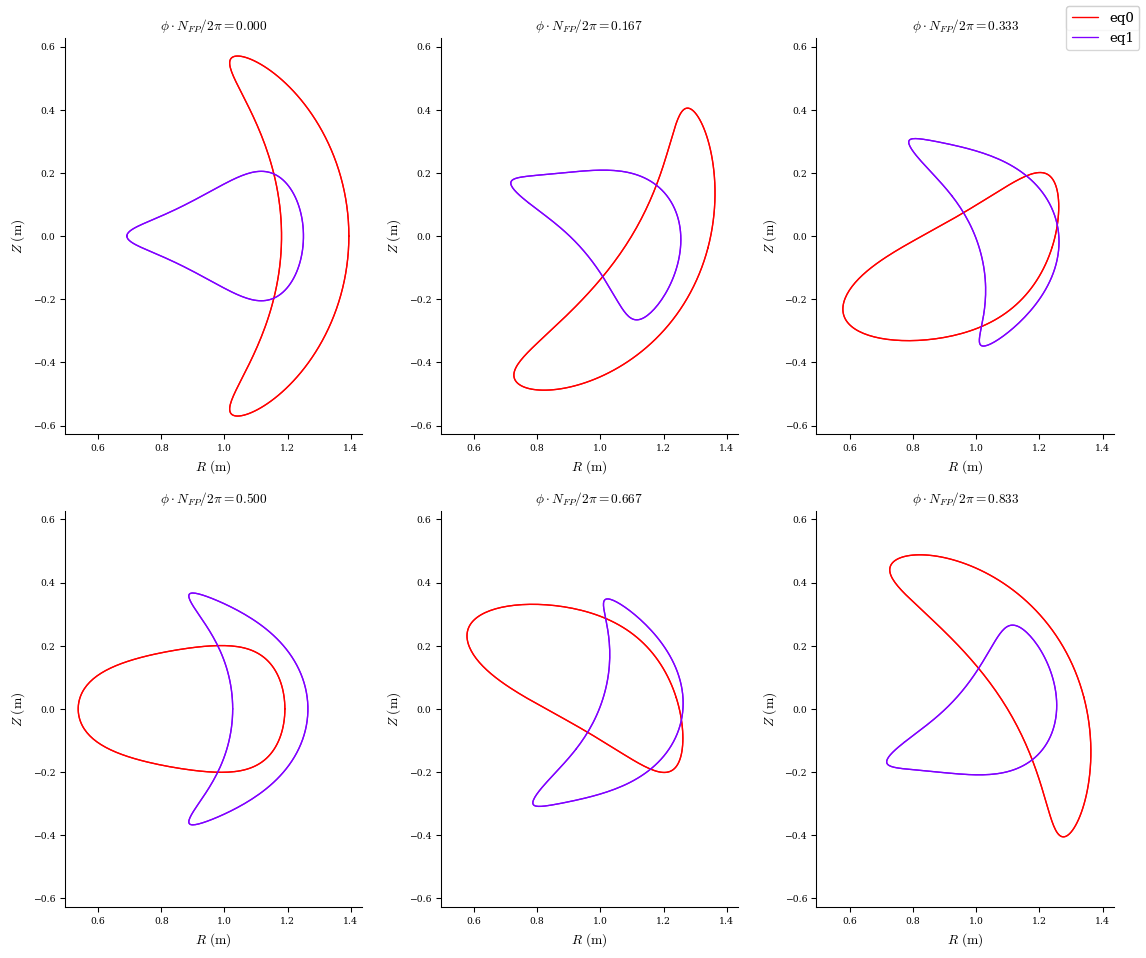

In [30]:
# No error occurs for some Equilibria and Surfaces
fig, ax = plot_comparison([eq0], rho=np.array(1.0), theta=0, labels=["eq0"], color="red");
plot_comparison([eq1], rho=np.array(1.0), theta=0, labels=["eq1"], ax=ax);
# plot_comparison([surf, eq0], rho=np.array(1.0), theta=0);

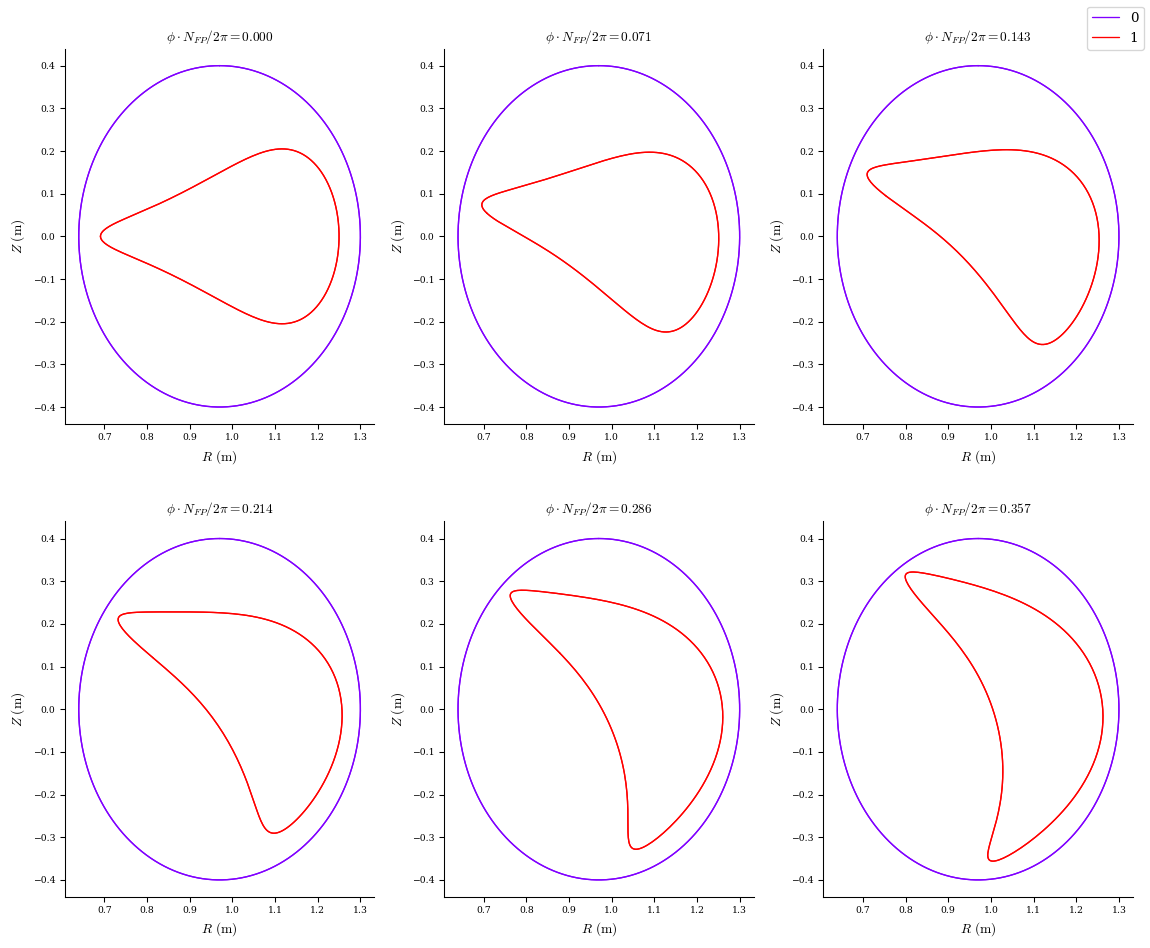

In [22]:
# However, error occurs for some Equilibrium and Surface.
plot_comparison([surf, eq1], rho=np.array(1.0), theta=0);

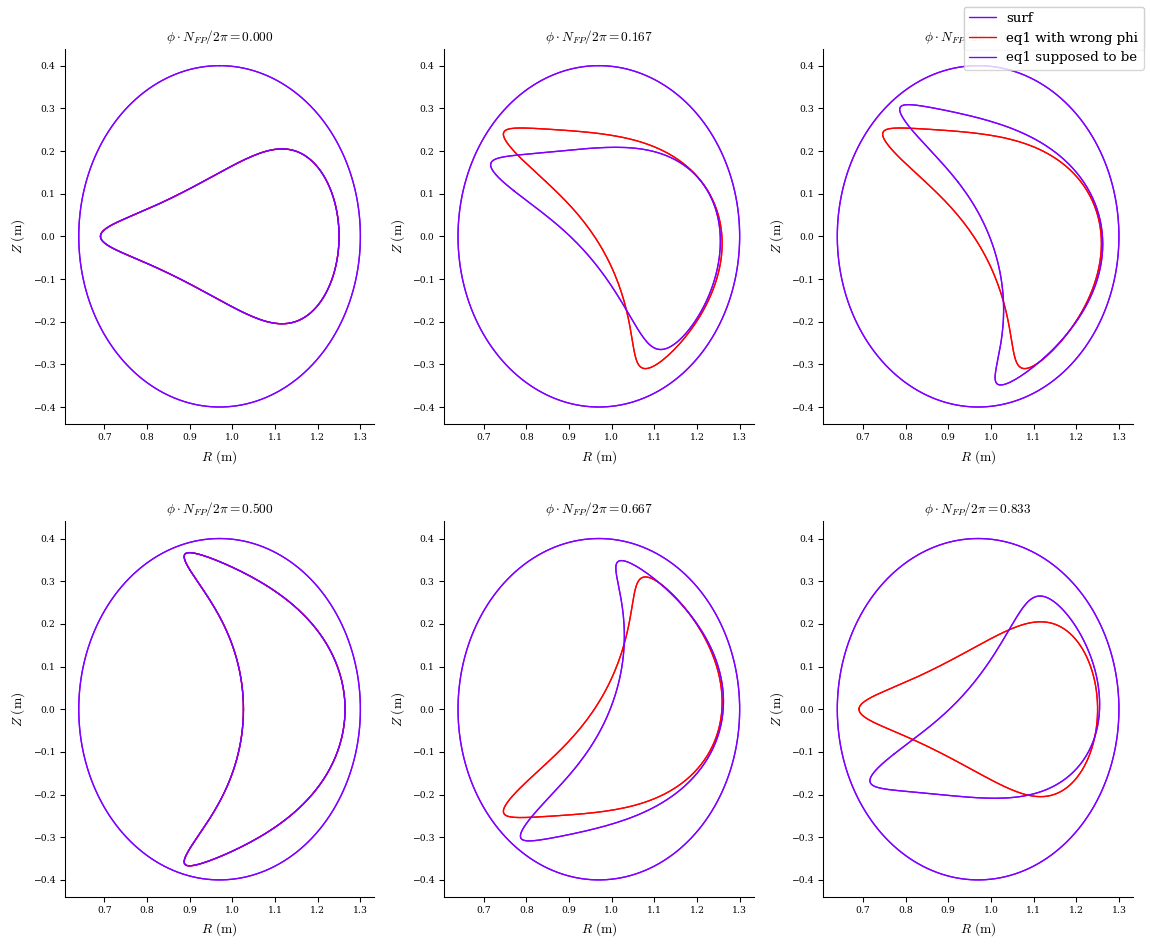

In [24]:
# This error no longer occurs, when I specify the phi parameter.
fig, ax = plot_comparison([surf, eq1], rho=np.array(1.0), theta=0, phi=np.linspace(0, 2*np.pi/eq0.NFP, 6, endpoint=False), labels=["surf", "eq1 with wrong phi"]);
plot_comparison([eq1], rho=np.array(1.0), theta=0, phi=np.linspace(0, 2*np.pi/eq1.NFP, 6, endpoint=False), labels=["eq1 supposed to be"], ax=ax);

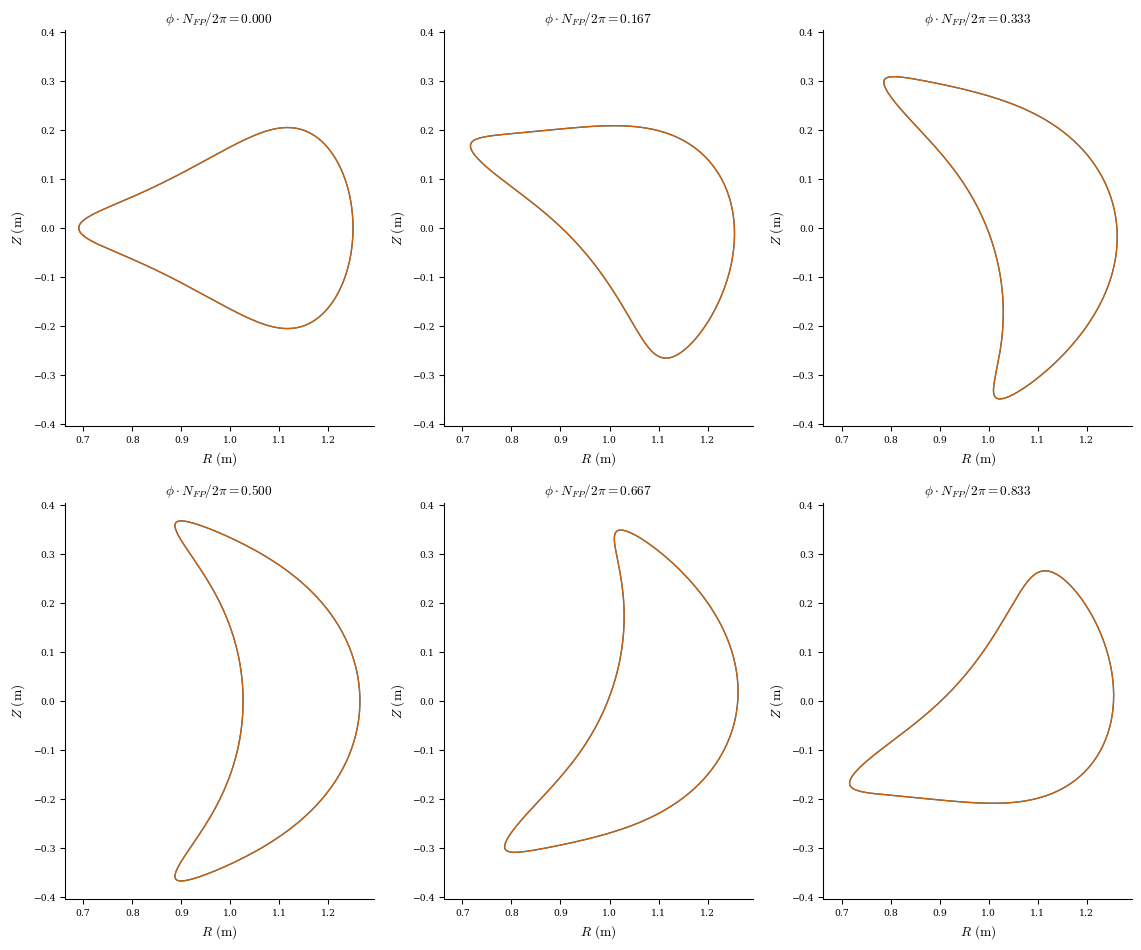

In [12]:
plot_surfaces(eq1, rho=1., theta=0, phi=np.linspace(0, 2*np.pi/eq1.NFP, 6, endpoint=False));

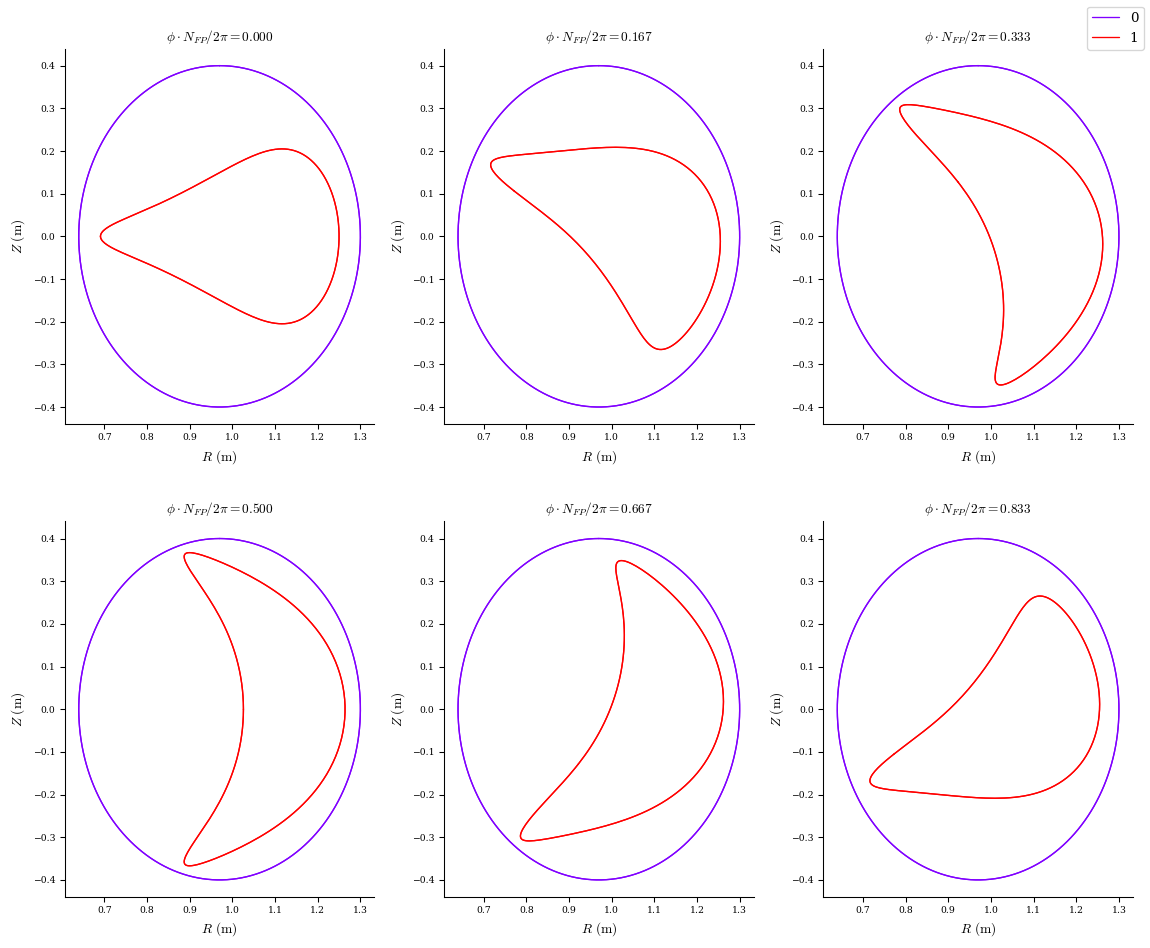

In [31]:
plot_comparison([surf, eq1], rho=1., theta=0, phi=np.linspace(0, 2*np.pi/eq1.NFP, 6, endpoint=False));